# Osnove
Podane so točke $A(1, 2)$, $B(5, 2)$ in $C(7, 4)$. Zapiši vektorje $\vec{AB}$, $\vec{BC}$ in $\vec{AC}$.

In [1]:
A = (1, 2)
B = (5, 2)
C = (7, 4)

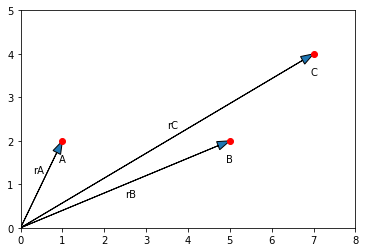

In [2]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot((1, 5, 7), (2, 2, 4), 'ro')
plt.annotate(xy=[1,1.5], text="A", ha="center")
plt.annotate(xy=[5,1.5], text="B", ha="center")
plt.annotate(xy=[7,3.5], text="C", ha="center")
plt.axis([0, 8, 0, 5])

plt.arrow(0, 0, *A, head_width=0.2, head_length=0.3, length_includes_head=True)
plt.arrow(0, 0, *B, head_width=0.2, head_length=0.3, length_includes_head=True)
plt.arrow(0, 0, *C, head_width=0.2, head_length=0.3, length_includes_head=True)

plt.annotate(xy=[7/2, 4/2+0.3], text="rC")
plt.annotate(xy=[5/2, 2/2-0.3], text="rB")
plt.annotate(xy=[1/2-0.2, 2/2+0.25], text="rA")


# plt.arrow(*A, *AB, head_width=0.2, head_length=0.3, length_includes_head=True)
# plt.arrow(*B, *BC, head_width=0.2, head_length=0.3, length_includes_head=True)
# plt.arrow(*A, *AC, head_width=0.2, head_length=0.3, length_includes_head=True)


plt.show()


In [3]:
def krajevni_vektor(tocka):
    return numpy.array(tocka)

rA = krajevni_vektor(A)
rB = krajevni_vektor(B)
rC = krajevni_vektor(C)

AB = rB - rA
BC = rC - rB
AC = rC - rA

print(f"AB: {AB}, BC: {BC}, AC: {AC}")

AB: [4 0], BC: [2 2], AC: [6 2]


Izračunaj vsoto $\vec{AB} + 2\vec{BC} - \vec{AC}$.

In [4]:
print(f"AB + 2*BC - AC = {AB + 2*BC - AC}")

AB + 2*BC - AC = [2 2]


Določi točko $D$ tako, da bo štirikotnik $ABCD$ paralelogram.

In [5]:
rD = rA + BC
D = tuple(rD)
print(f"D{D}")

D(3, 4)


Določi dolžino vektorjev $\vec{AB}$ in $\vec{AC}$.

In [6]:
from numpy.linalg import norm
print(f"Dolžina vektorja AB: {norm(AB)}")
print(f"Dolžina vektorja AC: {norm(AC)}")

Dolžina vektorja AB: 4.0
Dolžina vektorja AC: 6.324555320336759


# Izražave

V pravokotniku $ABCD$ točki $U$ in $V$ delita stranico $DC$ na tri skladne dele. Označimo $\vec{a} = \vec{AB}$ in $\vec{b} = \vec{BC}$. Z njima izrazi vektorje 
$\vec{AC}, \vec{AU}, \vec{VU}$ in $\vec{VA}$.

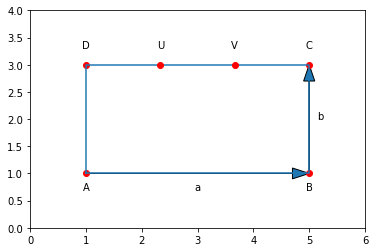

In [7]:
import matplotlib.pyplot as plt
A = (1, 1)
B = (5, 1)
C = (5, 3)
D = (1, 3)

rA, rB, rC, rD = [krajevni_vektor(v) for v in [A, B, C, D]]

DC = rC - rD
rU = rD + 1/3 * DC
rV = rD + 2/3 * DC

U = tuple(rU)
V = tuple(rV)

plt.plot(*zip(A, B, C, D), 'ro')
plt.plot(*zip(A, B, C, D, A))
plt.plot(*zip(U, V), 'ro')

offset_up = numpy.array((0, 0.3))
offset_down = numpy.array((0, -0.3))
offset_right = numpy.array((0.2, 0))

annotations = [{"xy": rA + offset_down, "text": "A"},
               {"xy": rB + offset_down, "text": "B"},
               {"xy": rC + offset_up, "text": "C"},
               {"xy": rD + offset_up, "text": "D"},
               {"xy": rU + offset_up, "text": "U"},
               {"xy": rV + offset_up, "text": "V"},
               {"xy": (rB+rA)/2 + offset_down, "text": "a"},
              {"xy": (rC+rB)/2 + offset_right, "text": "b"}]


for annotation in annotations:
    plt.annotate(**annotation, ha="center")

plt.arrow(*A, *(rB-rA), head_width=0.2, head_length=0.3, length_includes_head=True)
plt.arrow(*B, *(rC-rB), head_width=0.2, head_length=0.3, length_includes_head=True)

    
plt.axis([0, 6, 0, 4])
plt.show()


In [8]:
print("AC = a + b")
print("AU = b + 1/3 a")
print("VU = -1/3 a")
print("VA = -2/3 a - b")


AC = a + b
AU = b + 1/3 a
VU = -1/3 a
VA = -2/3 a - b


# Izražave

Podane so točke $A(0, 1)$, $B(4, 1)$, $C(6, 3)$ in $D(2, 3)$.

Določi presečišče $S$ diagonal $AC$ in $BD$ v štirikotniku $ABCD$.

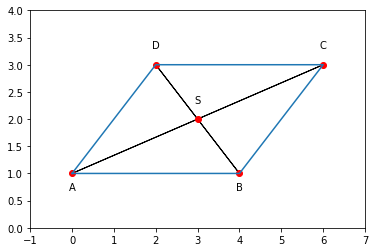

S: (3, 2)
k: 1/2, l: 1/2


In [9]:
import matplotlib.pyplot as plt
A = (0, 1)
B = (4, 1)
C = (6, 3)
D = (2, 3)

rA, rB, rC, rD = [krajevni_vektor(v) for v in [A, B, C, D]]

AC = rC - rA
BD = rD - rB

plt.plot(*zip(A, B, C, D), 'ro')
plt.plot(*zip(A, B, C, D, A))

offset_up = numpy.array((0, 0.3))
offset_down = numpy.array((0, -0.3))
offset_right = numpy.array((0.2, 0))

plt.arrow(*A, *AC, head_width=0.0, head_length=0.3, length_includes_head=True)
plt.arrow(*B, *BD, head_width=0.0, head_length=0.3, length_includes_head=True)
    
import sympy
from sympy import Matrix as M

k, l = sympy.symbols(['k', 'l'])
equation = sympy.Eq(M(rA) + k*M(AC), M(rB) + l*M(BD))
solution = sympy.solve(equation, k, l)

rS = rA + solution[k]*AC
S = tuple(rS)

plt.plot(*S, 'ro')

annotations = [{"xy": rA + offset_down, "text": "A"},
               {"xy": rB + offset_down, "text": "B"},
               {"xy": rC + offset_up, "text": "C"},
               {"xy": rD + offset_up, "text": "D"},
               {"xy": rS + offset_up, "text": "S"},]

for annotation in annotations:
    plt.annotate(**annotation, ha="center")

plt.axis([-1, 7, 0, 4])
plt.show()

print(f"S: {S}")
print(f"k: {solution[k]}, l: {solution[l]}")

Določi razmerje med $BS$ in $DS$.

In [10]:
print(f"l : (1-l) = {solution[l]/(1-solution[l])}")

l : (1-l) = 1


# Kot med vektorjema
Dana sta vektorja $\vec{a} = (3, 1)$ in $\vec{b} = (2, −1)$.

In [11]:
import numpy

def vektor(koordinate):
    return numpy.array(koordinate)

a = vektor((3, 1))
b = vektor((2, -1))

Izračunaj dolžini obeh vektorjev.

In [12]:
from numpy.linalg import norm

print(f"Dolžina vektorja a: {norm(a)}.")
print(f"Dolžina vektorja b: {norm(b)}.")

Dolžina vektorja a: 3.1622776601683795.
Dolžina vektorja b: 2.23606797749979.


Izračunaj skalarni produkt $\vec{a}\cdot\vec{b}$.

In [13]:
print(f"Skalarni product a in b: {numpy.dot(a, b)}.")


Skalarni product a in b: 5.


Izračunaj kot med vektorjema $\vec{a}$ in $\vec{b}$.

In [14]:
from math import pi

angle = numpy.arccos(numpy.dot(a, b) / (norm(a)*norm(b)))
print(f"Kot med vektorjema a in b je {angle} radianov.")
print(f"To je {360*angle/(2*pi)} stopinj.")

Kot med vektorjema a in b je 0.7853981633974484 radianov.
To je 45.00000000000001 stopinj.


# Vektorji v prostoru

Podan je trikotnik z oglišči $A(0, 10, 5)$, $B(10, −2, 7)$ in $C(11, 7, 0)$.

Izračunaj dolžino težiščnice na $c$.

In [15]:
A = (0, 10, 5)
B = (10, -2, 7)
C = (11, 7, 0)
rA = krajevni_vektor(A)
rB = krajevni_vektor(B)
rC = krajevni_vektor(C)

rSC = ((rA + rB)/2) 
CSC = rSC-C
print(f"Dolžina težiščnice na c je {norm(CSC)}.")

Dolžina težiščnice na c je 9.0.


Izračunaj koordinate težišča trikotnika.

In [16]:
rT = 1/3 * (rA + rB + rC)
print(f"Koordinate težišča trikotnika so: {rT}.")

Koordinate težišča trikotnika so: [7. 5. 4.].
